# Example of neural network image classification to CIFAR dataset

We train convolutional neural network by using CIFAR-10 public data since we need lots of images data (https://www.cs.toronto.edu/~kriz/cifar.html). And make a prediction of test images that we take a picture of.

## Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout

from PIL import Image

In [2]:
num_classes = 10
batch_size = 32
epochs = 2
image_size = 32
channel = 3
model_path = 'C:/Users/yukic/Documents/ADA/model_1.h5'
saved_model = 'model_1.h5'
image_1 = 'IMG_20190922_095445.jpg'
image_2 = 'IMG_20190922_095510.jpg'
image_3 = 'IMG_20190922_095536.jpg'
image_4 = 'IMG_20190921_082946.jpg'

## Data

As we will see below, all the images have the shape of width 32 and height 32 and colorful images. Let's see what pictures we have. Actually we will not use the below test data, because our test data is our own taken pictures, not public data.

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [4]:
label_name = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

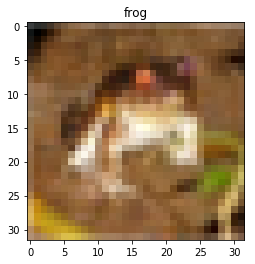

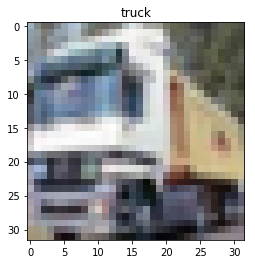

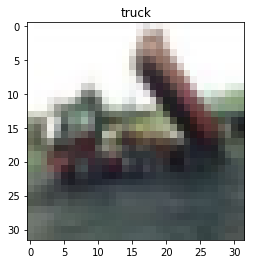

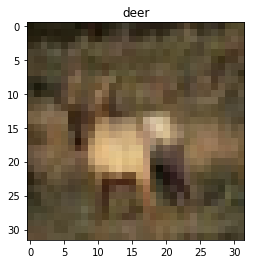

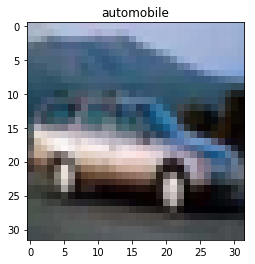

In [5]:
for i in range(5):
    plt.imshow(x_train[i])
    plt.title(label_name[int(y_train[i])])
    plt.show()

## Preprocessing

Usually before apply neural network, we normalize pixel data in order to get convergence and make the process faster. And also the below to_categorical makes one hot encoding, because when we compile model, we use categorical_crossentropy for loss function.

In [6]:
y_train = to_categorical(y_train, num_classes)
# y_test = to_categorical(y_test, num_classes)

In [7]:
x_train = x_train.astype('float32')
# x_test = x_test.astype('float32')
x_train /= 255
# x_test /= 255

## Model

"As always, deep learning is more an art than a science. We can provide guidelines that
suggest what is likely to work or not work on a given problem, but, ultimately, every
problem is unique; you’ll have to evaluate different strategies empirically. There is
currently no theory that will tell you in advance precisely what you should do to optimally
solve a problem." --- from "Deep learning with keras, by Francois Chollet"

In [8]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding = 'same', activation = 'relu', input_shape = x_train.shape[1:]))
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'sigmoid'))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 7200)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               3686912   
_________________________________________________________________
dropout (Dropout)    

In [9]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = tf.keras.optimizers.RMSprop(),
              metrics = ['accuracy'])

In [10]:
history = model.fit(x_train,
                    y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    validation_split = 0.2)

Train on 40000 samples, validate on 10000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/2
40000/40000 [==============================] - 108s 3ms/sample - loss: 1.5511 - acc: 0.4498 - val_loss: 1.2163 - val_acc: 0.5756
Epoch 2/2
40000/40000 [==============================] - 109s 3ms/sample - loss: 1.1396 - acc: 0.6050 - val_loss: 1.0289 - val_acc: 0.6442


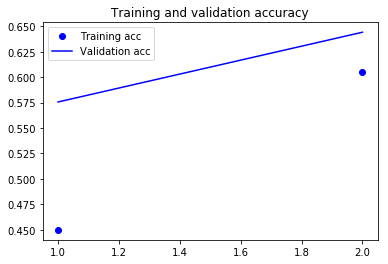

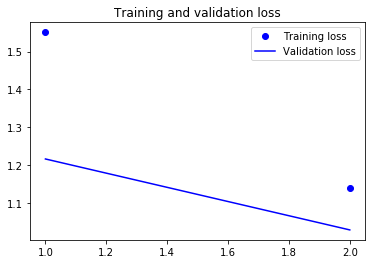

In [11]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Training model takes time, so save the weights outside, and reuse it later without training. I don't wanna update my weights so the below is commented out, but for the first time you need to.

In [12]:
# model.save(model_path)

## Load test images

I went to Broadway Street and randomly took pictures of automobile. So if our model predicts them accurately as automobile, we are successful. I used my Google phone, and load the pictures by using PIL package. We found the picture size is 3024 by 3025, but our model was train by 32 by 32 images, so we need to resize it.

Picture size: (3024, 3025)
Picture width: 3024
Picture height: 3025
Color channel: RGB


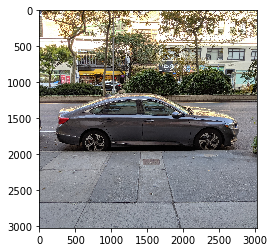

In [13]:
img_1 = Image.open(image_1)
print("Picture size:", img_1.size)
print("Picture width:", img_1.width)
print("Picture height:", img_1.height)
print("Color channel:", img_1.mode)
plt.imshow(img_1)
plt.show()

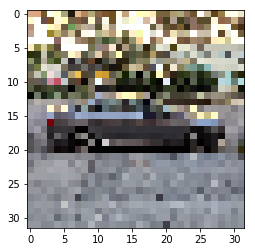

In [14]:
img_1 = img_1.resize((image_size, image_size))
plt.imshow(img_1)
plt.show()

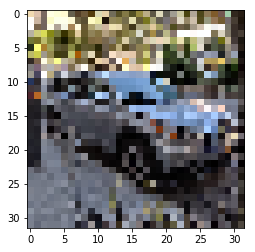

In [15]:
img_2 = Image.open(image_2)
img_2 = img_2.resize((image_size, image_size))
plt.imshow(img_2)
plt.show()

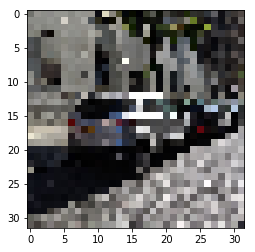

In [16]:
img_3 = Image.open(image_3)
img_3 = img_3.resize((image_size, image_size))
plt.imshow(img_3)
plt.show()

## Preprocessing of test data

We did normalization for training data so we need to do the same for our picture, and adjust shape of the data for model.

In [17]:
array_1 = np.array(img_1)
print(array_1.shape)
array_1 = array_1.reshape((1, image_size, image_size, channel))
print(array_1.shape)

(32, 32, 3)
(1, 32, 32, 3)


In [18]:
array_2 = np.array(img_2).reshape((1, image_size, image_size, channel))
array_3 = np.array(img_3).reshape((1, image_size, image_size, channel))

test_images = np.concatenate((array_1, array_2, array_3), axis = 0)
test_images.shape

(3, 32, 32, 3)

In [19]:
test_images = test_images.astype('float32')
test_images /= 255

## Prediction

In [20]:
loaded_model = load_model(saved_model)
loaded_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 7200)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               3686912   
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total para

In [21]:
# predictions = model.predict(test_images)
predictions = loaded_model.predict(test_images)
pred_index = np.argmax(predictions, axis = 1)
print(pred_index)
print(label_name[pred_index])

[1 1 9]
['automobile' 'automobile' 'truck']


So the first 2 pictures are accurately predicted, but the last one is not successful.

## Just for fun

I took a picture of my face, and see what's gonna happen if I apply the classification model.

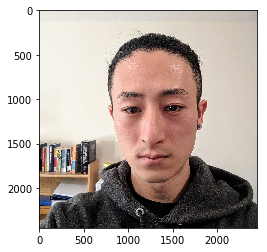

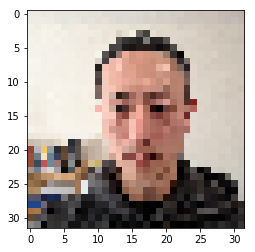

In [22]:
img_4 = Image.open(image_4)
plt.imshow(img_4)
plt.show()

img_4 = img_4.resize((image_size, image_size))
plt.imshow(img_4)
plt.show()

In [23]:
me = np.array(img_4)
me = me.reshape((1, image_size, image_size, channel))
me = me.astype('float32')
me /= 255

me_pred = model.predict(me)
me_index = np.argmax(me_pred, axis = 1)
print("Prediction is", me_index)
print("So I am predicted to be", label_name[int(me_index)], "!!")

Prediction is [9]
So I am predicted to be truck !!


Since the model is 10 classes prediction, which does not contain human face class, so you can't make this prediction.